## Tarea:

Cree una función que genere 1000 vectores aleatorios de una distribución normal multivariada con vector media $\mu=0_{d}$ y matrix de covarianza $2*I_{d}$, para diferente valores de d (dimension).

a) Calcule y grafique los intervalos de confianza de 95% para las distancias entre los vectores generados.

b) Calcule y grafique los intervalos de confianza de 95% para el cos ángulo entre los vectores generados.

c) Con una vector media $\mu=2_{d}$ y matrix de covarianza $2*I_{d}$. Realice la Fig. 1 (Media e Intervalos de 99%...) para este caso. (Note que se debe adaptar el código en la simulación y en el cálculo de la probabilidad asociada a la moda de la distribución). 

Ayuda:
La función numpy.random.multivariate_normal permite generar directamente vectores para esta distribución. Por ejemplo: np.random.multivariate_normal(np.zeros(3),np.eye(3),size=5) genera 5 valores aleatorios de la distribución centrada en zero y con matriz identidad.

In [1]:
import scipy.stats as stats
import numpy as np
from scipy.spatial.distance import cdist
import scipy
import pandas as pd
import matplotlib.pyplot as plt
def norma_euclideana(x): return np.linalg.norm(x)

In [2]:
N = int(1e4)
dim = np.array([1, 2, 4, 5, 8, 11, 16, 22, 32, 45, 64, 90, 128, 181, 256])
D = len(dim)

lower = np.zeros(D);
middle = np.zeros(D);
upper = np.zeros(D);
lower_ll = np.zeros(D);
middle_ll = np.zeros(D);
upper_ll = np.zeros(D);
max_ll = np.zeros(D);

for k in range(D):
    d = dim[k]
    y = np.zeros(N)
    ll = np.zeros(N)

    u = np.array(np.random.multivariate_normal(np.zeros(d),2*np.eye(d),size=N))
    dist = cdist(u,u,metric='euclidean')
    y = dist[np.triu_indices(N, k = 1)]
    ll = stats.multivariate_normal.logpdf(u,mean=np.zeros(d),cov=2*np.eye(d))
                
    lower[k] = np.percentile(y,2.5)
    middle[k] = np.percentile(y,50)
    upper[k] = np.percentile(y,97.5)
    
    lower_ll[k] = np.percentile(ll,2.5)
    middle_ll[k] = np.percentile(ll,50)
    upper_ll[k] = np.percentile(ll,97.5)
    
    max_ll[k] = np.sum(stats.norm.logpdf(np.zeros(d))) 
    #La moda de la distribución es el vector O

In [3]:
from collections import OrderedDict
df = pd.DataFrame(OrderedDict({'dim':dim, 'lb':lower, 'mid': middle, 'ub': upper,
                      'lb_ll' : lower_ll, 'mid_ll': middle_ll,
                      'ub_ll' : upper_ll, 'max_ll' : max_ll}))

In [4]:
df

dim         lb        mid         ub       lb_ll      mid_ll       ub_ll  \
0     1   0.062919   1.355481   4.506899   -3.799910   -1.498121   -1.265959   
1     2   0.453214   2.370253   5.446695   -6.221962   -3.238430   -2.556119   
2     4   1.378739   3.636142   6.652459  -10.619258   -6.702528   -5.298045   
3     5   1.824393   4.182356   7.189478  -12.737845   -8.516917   -6.735021   
4     8   2.952293   5.421258   8.349145  -18.753184  -13.814359  -11.193252   
5    11   3.911722   6.441112   9.365796  -24.896753  -19.102951  -15.833100   
6    16   5.225854   7.790101  10.663678  -34.337994  -27.838535  -23.641553   
7    22   6.624639   9.232439  12.120502  -46.385046  -38.496862  -33.272805   
8    32   8.551053  11.188163  14.059620  -65.196116  -56.131482  -49.671135   
9    45  10.651160  13.308639  16.181567  -89.731991  -79.093780  -71.180327   
10   64  13.220127  15.912145  18.776382 -125.194496 -112.617667 -102.611933   
11   90  16.198410  18.907993  21.768628 -173.045740 -158.644642 -146.816395   
12  128  19.851214  22.563042  25.381327 -242.436085 -225.558450 -211.252482   
13  181  24.125855  26.853422  29.670546 -339.018513 -319.207291 -301.783250   
14  256  29.207348  31.926217  34.735542 -474.444709 -451.242764 -430.736355   

        max_ll  
0    -0.918939  
1    -1.837877  
2    -3.675754  
3    -4.594693  
4    -7.351508  
5   -10.108324  
6   -14.703017  
7   -20.216648  
8   -29.406033  
9   -41.352234  
10  -58.812066  
11  -82.704468  
12 -117.624132  
13 -166.327875  
14 -235.248265

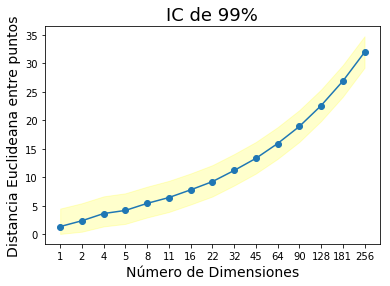

In [5]:
plt.plot(df.mid,'o-')
plt.fill_between(np.arange(len(df)),df.lb, df.ub,color='yellow', alpha=0.2)
plt.xticks(np.arange(len(df)), df.dim)
plt.xlabel('Número de Dimensiones',size=14)
plt.ylabel('Distancia Euclideana entre puntos',size=14)
plt.title('IC de 99%', size=18)
plt.show()

In [6]:
### Punto B

N = int(1e4)
dim = np.array([1, 2, 4, 5, 8, 11, 16, 22, 32, 45, 64, 90, 128, 181, 256])
D = len(dim)

lower = np.zeros(D);
middle = np.zeros(D);
upper = np.zeros(D);
lower_ll = np.zeros(D);
middle_ll = np.zeros(D);
upper_ll = np.zeros(D);
max_ll = np.zeros(D);

for k in range(D):
    d = dim[k]
    y = np.zeros(N)
    ll = np.zeros(N)

    u = np.array(np.random.multivariate_normal(np.zeros(d),2*np.eye(d),size=N))
    dist = 1-cdist(u,u,metric='cosine')
    y = np.arccos(dist[np.triu_indices(N, k = 1)])
    ll = stats.multivariate_normal.logpdf(u,mean=np.zeros(d),cov=2*np.eye(d))
                
    lower[k] = np.percentile(y,2.5)
#    middle[k] = np.percentile(y,50)
    middle[k] = y.mean()
    upper[k] = np.percentile(y,97.5)
    
    lower_ll[k] = np.percentile(ll,2.5)
    middle_ll[k] = np.percentile(ll,50)
    upper_ll[k] = np.percentile(ll,97.5)
    
    max_ll[k] = np.sum(stats.norm.logpdf(np.zeros(d))) 
    #La moda de la distribución es el vector O

In [7]:
from collections import OrderedDict
df = pd.DataFrame(OrderedDict({'dim':dim, 'lb':lower, 'mid': middle, 'ub': upper,
                      'lb_ll' : lower_ll, 'mid_ll': middle_ll,
                      'ub_ll' : upper_ll, 'max_ll' : max_ll}))

In [8]:
df

dim        lb       mid        ub       lb_ll      mid_ll       ub_ll  \
0     1  0.000000  1.570941  3.141593   -3.782827   -1.490953   -1.265982   
1     2  0.078476  1.570893  3.063138   -6.303091   -3.228446   -2.556328   
2     4  0.498508  1.570742  2.642998  -10.572613   -6.736153   -5.304432   
3     5  0.624101  1.570759  2.517260  -12.738337   -8.503610   -6.749759   
4     8  0.841570  1.570866  2.300195  -18.851352  -13.784772  -11.203762   
5    11  0.957049  1.570786  2.184541  -25.015607  -19.100342  -15.824343   
6    16  1.067626  1.570773  2.073886  -34.340061  -27.896900  -23.668329   
7    22  1.144826  1.570819  1.996938  -46.212621  -38.503322  -33.327248   
8    32  1.219784  1.570778  1.921814  -65.185116  -56.134749  -49.587632   
9    45  1.275807  1.570787  1.865673  -89.724021  -79.134766  -71.092544   
10   64  1.324078  1.570789  1.817392 -124.766378 -112.601092 -102.853229   
11   90  1.363266  1.570795  1.778394 -172.983323 -158.556992 -146.895924   
12  128  1.396959  1.570793  1.744613 -242.475816 -225.624787 -211.004576   
13  181  1.424733  1.570807  1.716837 -338.724744 -319.269623 -301.895543   
14  256  1.448107  1.570779  1.693508 -474.987174 -451.590942 -430.936986   

        max_ll  
0    -0.918939  
1    -1.837877  
2    -3.675754  
3    -4.594693  
4    -7.351508  
5   -10.108324  
6   -14.703017  
7   -20.216648  
8   -29.406033  
9   -41.352234  
10  -58.812066  
11  -82.704468  
12 -117.624132  
13 -166.327875  
14 -235.248265

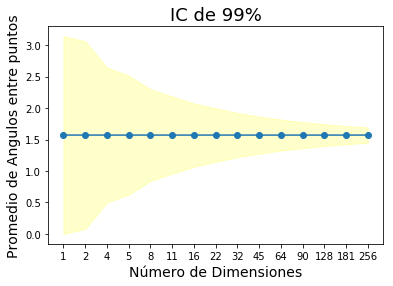

In [9]:
plt.plot(df.mid,'o-')
plt.fill_between(np.arange(len(df)),df.lb, df.ub,color='yellow', alpha=0.2)
plt.xticks(np.arange(len(df)), df.dim)
plt.xlabel('Número de Dimensiones',size=14)
plt.ylabel('Promedio de Angulos entre puntos',size=14)
plt.title('IC de 99%', size=18)
plt.show()

In [10]:
### Punto C
N = int(1e4)
dim = np.array([1, 2, 4, 5, 8, 11, 16, 22, 32, 45, 64, 90, 128, 181, 256])
D = len(dim)

lower = np.zeros(D);
middle = np.zeros(D);
upper = np.zeros(D);
lower_ll = np.zeros(D);
middle_ll = np.zeros(D);
upper_ll = np.zeros(D);
max_ll = np.zeros(D);

for k in range(D):
    d = dim[k]
    ll = np.zeros(N)

    u = np.array(np.random.multivariate_normal(np.ones(d)*2,2*np.eye(d),size=N))
    ll = stats.multivariate_normal.logpdf(u,mean=np.ones(d)*2,cov=2*np.eye(d))
    
    lower_ll[k] = np.percentile(ll,.5)
    middle_ll[k] = np.percentile(ll,50)
    upper_ll[k] = np.percentile(ll,99.5)
    
    max_ll[k] = stats.multivariate_normal.logpdf(np.ones(d)*2,mean=np.ones(d)*2,cov=2*np.eye(d))
    #La moda de la distribución es el vector O

In [11]:
from collections import OrderedDict
df = pd.DataFrame(OrderedDict({'dim':dim, 'lb':lower, 'mid': middle, 'ub': upper,
                      'lb_ll' : lower_ll, 'mid_ll': middle_ll,
                      'ub_ll' : upper_ll, 'max_ll' : max_ll}))

In [12]:
df

dim   lb  mid   ub       lb_ll      mid_ll       ub_ll      max_ll
0     1  0.0  0.0  0.0   -5.262052   -1.495026   -1.265531   -1.265512
1     2  0.0  0.0  0.0   -7.660586   -3.223739   -2.536580   -2.531024
2     4  0.0  0.0  0.0  -12.267313   -6.746562   -5.162494   -5.062048
3     5  0.0  0.0  0.0  -14.947840   -8.476978   -6.535528   -6.327561
4     8  0.0  0.0  0.0  -21.170925  -13.796407  -10.834038  -10.124097
5    11  0.0  0.0  0.0  -26.999207  -19.102308  -15.210122  -13.920633
6    16  0.0  0.0  0.0  -37.282622  -27.943389  -22.827562  -20.248194
7    22  0.0  0.0  0.0  -49.161617  -38.473794  -32.261002  -27.841267
8    32  0.0  0.0  0.0  -68.672635  -56.225025  -48.184379  -40.496388
9    45  0.0  0.0  0.0  -93.778159  -79.182425  -69.174524  -56.948046
10   64  0.0  0.0  0.0 -129.221502 -112.647712 -100.273955  -80.992776
11   90  0.0  0.0  0.0 -177.674818 -158.474368 -143.527294 -113.896091
12  128  0.0  0.0  0.0 -247.963528 -225.636727 -207.259374 -161.985552
13  181  0.0  0.0  0.0 -346.632260 -319.289947 -296.132903 -229.057694
14  256  0.0  0.0  0.0 -483.151114 -451.555553 -424.785194 -323.971104

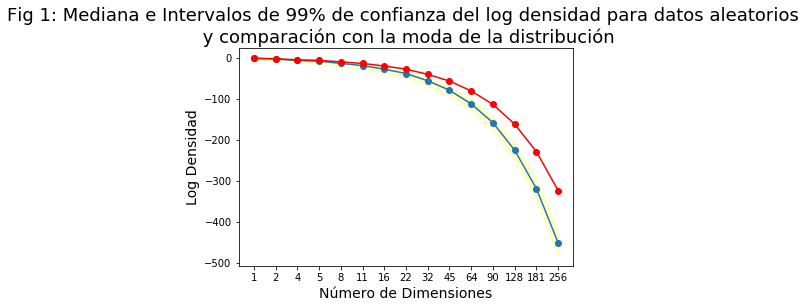

In [13]:
plt.plot(df.mid_ll,'o-')
plt.plot(df.max_ll,'ro-')
plt.fill_between(np.arange(len(df)),df.lb_ll, df.ub_ll,color='yellow', alpha=0.2)
plt.xticks(np.arange(len(df)), df.dim)
plt.xlabel('Número de Dimensiones',size=14)
plt.ylabel('Log Densidad',size=14)
plt.title('Fig 1: Mediana e Intervalos de 99% de confianza del log densidad para datos aleatorios \n y comparación con la moda de la distribución', size=18)
plt.show()